# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        # generates random distribution with mean(mu) and sigma(sigma)
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

In [2]:
!pip install ipython-autotime

  Running setup.py bdist_wheel for ipython-autotime ... done
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%load_ext autotime
%matplotlib inline
%autoreload 2

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from task import Task

In [4]:
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

time: 68 ms


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

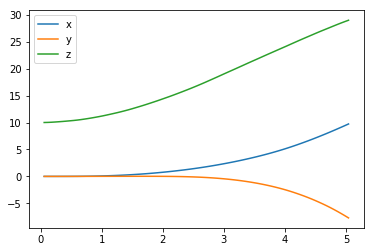

time: 280 ms


In [5]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

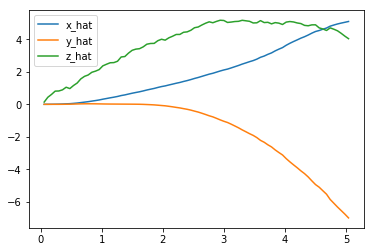

time: 217 ms


In [6]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

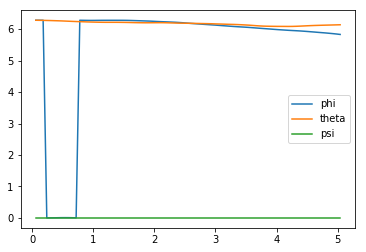

time: 219 ms


In [7]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

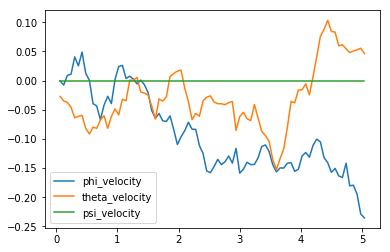

time: 243 ms


In [8]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

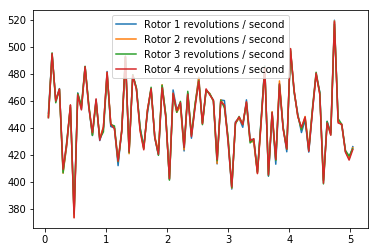

time: 275 ms


In [9]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  9.7307903   -7.70374947  28.97978983   5.83182438   6.13954855   0.        ]
[ 5.08927679 -6.97878675  4.03304184]
[-0.23545479  0.04631165  0.        ]
time: 4.64 ms


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [12]:
import sys
import pandas as pd
from agent.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.473 (best =  -0.112), noise_scale = 3.2625time: 19 s


This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [23]:
# imports
import sys
import os
import pickle
import random
import math
from collections import namedtuple, deque
from keras import layers, models, optimizers
from keras import backend as K
import numpy as np
import copy
from IPython.display import Image
from show_flight import Quadrotor
import imageio

from destination_task import Destination_Task
from agent.agent import DDPG_Agent, OUNoise, ReplayBuffer

time: 2.92 ms


In [15]:
## TODO: Train your agent here.

# set save destination
export_path = './data/'
if not os.path.exists(export_path):
    os.makedirs(export_path)
    
# set target destination(task) and initialize agent
init_pose = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
target_pos = np.array([6.0, 6.0, 12.0])
task = Destination_Task(init_pose=init_pose, target_pos=target_pos, runtime=5.0)
agent = DDPG_Agent(task)

# initialize score variables
results_all = []
high_score = -1.0
low_score = 1.0
n_episodes = 500
train_score = []

# training loop
for i_episode in range(1, n_episodes+1):
    # reset episode
    state = agent.reset_episode()
    score = 0
    
    labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'vx', 'vy', 'vz', 'vphi', 'vtheta', 'vpsi', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'reward', 'score']
    ep_results = {x: [] for x in labels}
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        
        agent.step(action, reward, next_state, done)
        state = next_state
        
        score += reward
        
        high_score = max(high_score, score)
        low_score = min(low_score, score)
        
        # track results for visualization
        ep_results['time'].append(task.sim.time)
        ep_results['reward'].append(reward)
        for s, i in enumerate(labels[1:-2]):
            ep_results[i].append(state[s])
            
          
        
        if done:
            print("\rEpisode {:4d} / {}, score = {:7.3f}, low score = {:7.3f}, high score = {:7.3f}".format(i_episode, n_episodes, score, low_score, high_score), end="")
            train_score.append(score)
            ep_results['score'].append(score)
            break
            
    results_all.append(ep_results)
    sys.stdout.flush()

Episode  500 / 500, score =   6.792, low score =   0.032, high score =  12.082time: 16min 36s


In [16]:
# save to pickle
with open('{}data.bin'.format(export_path), 'wb') as pickleFile:
    pickle.dump(results_all, pickleFile)

time: 661 ms


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

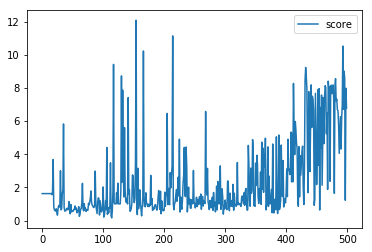

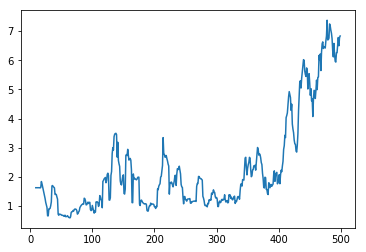

time: 443 ms


In [17]:
## TODO: Plot the rewards.
plt.plot(train_score, label='score')
plt.legend()
_ = plt.ylim()

df = pd.DataFrame(train_score)
rolling_mean = df.rolling(window=10).mean().plot(legend=False)

In [18]:
# Sort results according to reward
e_rewards = [np.sum(e['reward']) for e in results_all]
result_indices = np.argsort(e_rewards)

# Get top result
best_ep = list(reversed(result_indices))[0:1]
#print(results_all[best_ep])

time: 7.79 ms


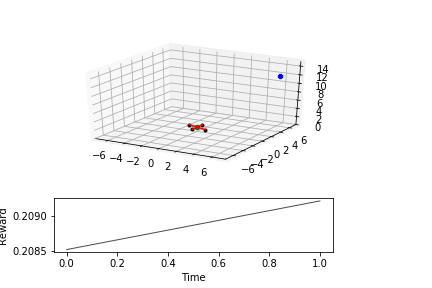

time: 12 s


In [24]:
export_path = './video/'
if not os.path.exists(export_path):
    os.makedirs(export_path)
  
images = []

for ix, e in enumerate(best_ep):
    ep = results_all[e]

    filepath = "{}frame{:04}_{:04}.png".format(export_path, ix, 0)

    q = Quadrotor(x=ep['x'][0],
        y=ep['y'][0],
        z=ep['z'][0],
        roll=ep['phi'][0],
        pitch=ep['theta'][0],
        yaw=ep['psi'][0],
        reward=ep['reward'][0],
        title=None,
        filepath=filepath)

    q.set_target(6.0, 6.0, 12.0)

    # Render episode frames
    for i in range(1, len(ep['x'])):
        filepath = "{}frame{:04}_{:04}.png".format(export_path, ix, i)
        q.update_pose(x=ep['x'][i],
            y=ep['y'][i],
            z=ep['z'][i],
            roll=ep['phi'][i],
            pitch=ep['theta'][i],
            yaw=ep['psi'][i],
            reward=ep['reward'][i],
            title=None,
            filepath=filepath)

        images.append(imageio.imread(filepath))

    q.close()
                 

# Save frames to animated gif
imageio.mimsave('movie.gif', images)

# Render gif
with open('./movie.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The task specified was for the agent/quadcoptor to fly from [0,0,1] to an elevated point a bit futher away at [6, 6, 12]. 

I did try (for quite some time) to find a way to get the agent to remain and hover at the target destination, but sadly to no avail(due to time contraints).

After many failed experiments with a reward function that deducts a weighted sum of penalties on both distance from the target and high euler angles from a constant reward, resulting in rewards averaging around -6000. I came across a <a href="https://github.com/parkitny" target="_blank">fellow student's</a> reward function designed for a landing task and altered it to fit my task. 

The reward function combines a stability penalty on non-zero euler angles on roll and yaw, a penalty on the pythagorean distance from the target and a decay function that ensures that reward values remain positive.

The reward function stabalizes the flight of the agent by giving the highest reward if two of the agents euler angles (roll and yaw) remain at 0, allowing for deviations in pitch so that the agent can control it's movement beyond flying straight up or straight down.

Whilst the current iteration successfully has the agent reach the target point specified in the task, it unfortunatelly doensn't always successfully complete the task.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

At the start of this project I decided to use the provided boilerplate code and initially implemented the DDPG algorithm with the default hyperparameters. After numerous unsuccessful attempts at selecting hyperparameters on a trial and error basis I finally got around to trying the hyperparameters and neural network architecture outlined on page 11 of the <a href='https://arxiv.org/pdf/1509.02971.pdf' target="_blank">Continuous Control with Deep Reinforcement Learning</a> Paper.

The hyperparameters used for the agent were as follows:

- Actor learning rate: 0.001
- Critic learning rate: 0.0001
- Soft target updates (tau): 0.001
- Discount factor(gamma): 0.99
- Minibatch size: 128(altered from the original 64)
- Replay buffer(memory) size: 1000000
- Ornstein-Uhlenbeck(exploration parameters): 
    - theta: 0.15
    - sigma: 0.3

Neural network architectures:

Actor:
   
The actor has 2 hidden layers with 400 and 300 units respectively, both hidden layers used batchnormalization followed by RELU as the activation function. The final output layer was a tanh layer to bound the actions.

Critic:

The critic network also had two hidden layers with 400 and 300 units, with the states being fed into the first hidden layer and the actions only being added to the second hidden layer as described in the continous control paper.
Both hidden layers used batchnormalization and RELU activations with added L2 weight decay of 0.01.

The final layer for both the actor and the critic were initialized from a uniform distribution  of [-0.003,0.003] 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The rewards during training ranged from a low score of 0.032 and a high score of 12.082 with a very high variance throughout the entire training process.

The agent did however gradually improve on it's mean rewards over a rolling window of 10 episodes with a significant jump after around 340 episodes. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

This was by far the hardest project I've been faced with in this nanodegree. I spent many hours learning about reinforcement learning using both the provided material and external sources. One of the gems I came across was an Introduction to Reinforcement Learning taught by Google DeepMind's David Silver, one of the co-authors of the DDPG paper.

Much like the early episodes of the agent's training process, I spent a lot of time randomly trying different actions(architectures and hyperparameters) during the first few days of the project. Things gradually improved once I found a way to visualize the flight projection of the agent (the repository at https://github.com/AtsushiSakai/PythonRobotics was a lifesaver). I had difficulties merely imagining the flightpath just by looking at the plotted x,y,z positions of the agent.

Things improved further when I started trying to implement the experiment details of the original paper, and really picked up when I improved training iteration time by simoultaneously using multiple virtual machines to train the agent, as each training session would take 40+ minutes. I setup a Kaggle Kernel, a Google Colab Kernel, my personal computer and the workspace provided by Udacity.

The most challenging part was finding a suitable reward function, had I not stumbled across the reward function at https://github.com/parkitny I'd probably still be searching for a solution to this day... I am truly grateful for github and open-source code. 

I would like to eventually improve on the code by someday getting it to hover in place once the target destination has been reached, instead of flying off into the distance.

In summary I really enjoyed this project, despite the struggle, and look forward to delving deeper into reinforcement learning, as I find the subject to be fascinating. I am amazed to the point of confusion by the ideas that leading researchers in the field have come up with.